<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Lesson + Lab)

***

Week 2 | Lesson 4.1-Alt

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Know what situations **grouping** is useful for
- Explain the **`.groupby()`** feature in Pandas
- Demonstrate aggregation /w plotting methods in Pandas

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | [Introduction](#introduction)   |   |
| 15 min  | [Demo /Guided Practice](#demo)  | Discuss Grouping |
| 30 min  | [Demo /Guided Practice](#demo)  | Demonstrate .groupby |
| 20 min  | [Demo /Guided Practice](#demo)  | Plotting with groups |
| 60+ min  | [Independent Practice](#ind-practice)  |   |
| 10 min  | [Conclusion](#conclusion)  |   |


<a name="introduction"></a>
## Introduction: Grouping (5 mins)

## What have you used grouping for (work, reactionally)?

## Generally:  Multi-Dimensional Data Analysis! 
   - Describe segments of your data based on unique values
   - Understand latent charactaristics of your data
       - Summary statistics of subsets
       - Discover patterns that exist in subsets
   - Finding duplicate values given specific variables
   - Apply aggregate functions to subsets, based on variable aspects of our datasets
   

## Specific Examples
 - Sum of crimes given time of day in SF (morning, afternoon, night)
 - Count numer of people with the same last name
 - Median number of multi-unit buildings in a region
 - Popularity of movie genres based on ticket sales
 - Segmenting customers based on age, buying habbits, interests, behavior
 - Using the "GROUP BY" clause in a database query using SQL (you will learn this soon!)

![](http://www.omnis.net/support/images/technews/g2msimplebargraph.jpg)

_Think about what this would look like as a summary statistic like mean or sum?_

![](http://stephanieevergreen.com/wp-content/uploads/2013/08/DivergingFinal.png)

_Summary grouped by question and response category_

![](http://zmjones.com/static/posts/titanic-survival-glm.png)

## A slight side-trip with [Simpsons Paradox](http://vudlab.com/simpsons/)

# Demo / Codealong - .groupby()

First, a sample dataset to get us thinking about grouping on a small scale dataset.

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'cat1':['X','X','Y','Y','Z'],
                   'cat2':['alpha','beta','alpha','beta','alpha'],
                   'a':np.random.randn(5),
                   'b':np.random.randn(5)})
df

**This gives us a specific feature "a", grouped by cat1.** 

_Notice that groups don't really print anything interesting on their own._

In [ ]:
group = df['a'].groupby(df['cat1'])
group

**Groups can be operated on in aggregate.**

In [ ]:
# mean
group.mean()

In [ ]:
# median
group.median()

In [ ]:
# sum
group.sum()

**We can use group keys that are series as well**

For example:

In [ ]:
#We'll make some arrays for use as keys
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

#Now using the data from dataset1, group the means by city and month
df['a'].groupby([cities,month]).mean()

This is an equivelent method for doing the same thing but you will find this to be much more common when dealing with DataFrames.

In [ ]:
# adding cites and month to our DataFrame
df['cities'] = np.array(['NY','LA','LA','NY','NY'])
df['month'] = np.array(['JAN','FEB','JAN','FEB','JAN'])
df

In [ ]:
df.groupby(['cities', 'month']).mean()

## For 1 minute:  Ask your group what would you expect to happen if you didn't specifiy a column / feature label?

In [ ]:
# It looks nicer for 1 thing!
df.groupby(['cities', 'month']).mean()

Grouping by a single variable can be done by specifying a variable key string.

In [ ]:
df.groupby('cities').mean()

In [ ]:
df.groupby('cities').count()

## What's going on here!?

_(visually)_

![](http://www.w3resource.com/sql/sql-root-images/group-by.gif)

## 5 mins discuss with your group:  How might you use this in the future?

**Getting Subsets By Index**

Usually, we tell a DataFrame what we want by axis, to get a series.  with groups, we can still select columns, but the way we select subsets is a little different.  We must request them with a method for example:

In [ ]:
# Re-init our test data
df = pd.DataFrame({'cat1':['X','X','Y','Y','Z'],
                   'cat2':['alpha','beta','alpha','beta','alpha'],
                   'a':np.random.randn(5),
                   'b':np.random.randn(5)})

df['cities'] = np.array(['NY','LA','LA','NY','NY'])
df['month'] = np.array(['JAN','FEB','JAN','FEB','JAN'])

df

In [ ]:
# our group by values of cat2, inside of groups by cities
df.groupby(["cities", "cat2"]).size()

In [ ]:
# Fetching group subset pairs
my_group = df.groupby(["cities"])
for c in my_group.groups: 
    print c

In [ ]:
# Say we want NY only from our subset
my_group.get_group('NY')

## 2-5 minutes try to do this with a partner:

 - Make a group object using citites and cat2
 - Select the cities subgroup "NY" with cat2 values "alpha"
 - Use get_group() on your group object, and pass a tuple with 2 values as the parameter
   - The first tuple element is the value you are looking for in "cities" index
   - The 2nd tuple element is the value you are looking for in "cat2"

In [ ]:
my_group = df.groupby(["cities", "cat2"])
my_group.get_group(('NY', 'alpha'))


## Explain what happened to me!?

More useful info about groups and selection in the [Pandas Cookbook docs](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)

A quick note about two popular aggregates that seem the same, but are not!

.count() vs .size()

In [ ]:
# Gives us counts of record rows repeated over variable columns
df.groupby('cities').count()

In [ ]:
# .size gives us counts as series, not repeated values over column variables
df.groupby('cities').size()

With a Pandas **group object**, .count(), .size(), .sum(), .mean(), .std() are some very common ways to apply calcuation operations in aggregate to subsets of your data.

[Pandas .groupby docs](http://pandas.pydata.org/pandas-docs/version/0.15.2/groupby.html)


In [ ]:
# Other group by methods include -- 
# sorry was too pressed for time to manually format this list

groupby_list = """
gb.filter  gb.get_group  gb.height  gb.last gb.median gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform
gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var
gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight
"""

cleaned_list = map(lambda item: item.replace("gb", "").strip(), groupby_list.split(".")[1:])
pd.DataFrame(cleaned_list, columns=[".groupby() aggregate functions"])

## 10 Minute Break!

# (basic) Plotting with Groups


In [ ]:
# This is a reminder of what our dataframe looks like
df

In [ ]:
# We want to see the count of alpha + beta values, given cities
df.groupby("cities")['cat2'].count()

In [ ]:
df.groupby("cities")['cat2'].count().plot(kind="bar")

## Show of hands -- who remembers how to groupby with more than one variable?

In [ ]:
df.groupby(["cities","cat2"]).size().plot(kind="bar")

In [ ]:
# Unstack will pull-apart group values for easy display
df.groupby(["cities","cat2"]).size().unstack().plot(kind="bar")

In [ ]:
# Stacking isn't a bad choice for fewer categories but can look cluttery with lots of categories
df.groupby(["cities","cat2"]).size().unstack().plot(kind="bar", stacked=True)

Bar charts are great for displaying quanitites with groups and understanding qantity / size within subsets.  This is only an "introduction".  There are many ways to plot things.

In [ ]:
import matplotlib.pyplot as plt

classes = ["class 1"] * 5 + ["class 2"] * 5
vals = [1,3,5,1,3] + [2,6,7,5,2]
p_df = pd.DataFrame({"class": classes, "vals": vals})

fig, ax = plt.subplots(figsize=(8,6))
for label, df in p_df.groupby('class'):
    df.vals.plot(kind="kde", ax=ax, label=label)
plt.legend()

In [ ]:
# This could be labled better but notice we can also plot negative values
df.groupby("cities").plot(kind="barh")

In [ ]:
# Here's a plot I made with mysterious code!

## Group Exercize (~80mins-ish)

We are going to investigate the nuances of UFO sightings around the US.  By now you should be able to perform groupby operations in multiple dimensions and investigate the relationships between subsets of datasets with basic aggregation.

_Protip, to turn off slide type headers from every dataframe, go to "View" and select "None" from "Cell Toolbar"_

In [3]:
import pandas as pd, numpy as np, seaborn as sns

%matplotlib inline

In [4]:
# Load the UFO dataset!
# Did you know you can load csv over HTTP?  It's not ideal, but it can be done!
ufo = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_17/master/data/ufo.csv')
ufo.head()

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

### 1. How many non-null values exist per each variable?

The first thing that is important to know is how complete our dataset is and how uniform are the values.

In [97]:
# Solution here
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
City               80496 non-null object
Colors Reported    17034 non-null object
Shape Reported     72141 non-null object
State              80543 non-null object
Time               80543 non-null object
dtypes: object(5)
memory usage: 3.1+ MB


### 2. What is the breakdown of dtypes in our dataframe?

In [149]:
# Solution here
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

### 3. Provide a "Data Dictionary" that describes these features:

 - Variable / feature name
 - Brief description of what variable appears to represent
 - Expected dtype(s)
 - Number of unique values observed if categorical and < 20 unqiue 

_Please use "Markdown" tables to provide this info.  It's a good idea to get familliar with using markdown format when communicating your results.  Here's a primer on [markdown tables](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables).  No groaning allowed!_

## Change this cell to a "markdown" type cell
| City          | Colors reported | Shape Reported |State          |Time   
| ------------- |:---------------:|:--------------:|:-------------:|
| City UFO sited| Color of UFO    | Shape Seen     |State reported |Time


### 3. Which colors are most commonly reported?
Provide a breakdown of colors by count.

In [151]:
ufo['Colors Reported'].value_counts()[0:10]

ORANGE            5216
RED               4809
GREEN             1897
BLUE              1855
YELLOW             842
RED ORANGE         486
RED GREEN          469
RED BLUE           445
RED GREEN BLUE     166
GREEN BLUE         147
Name: Colors Reported, dtype: int64

### 4. Which shapes are most commonly reported?

In [160]:
ufo['Shape Reported'].value_counts()[0:10]

LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
Name: Shape Reported, dtype: int64

### 5. Are there any shapes that take on some colors more than others?
_* Warning: Use of broad langauge._

In [164]:
ufo.groupby(['Shape Reported','Colors Reported']).size().order(ascending = False)

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


Shape Reported  Colors Reported         
LIGHT           RED                         1188
                ORANGE                      1122
FIREBALL        ORANGE                       884
CIRCLE          ORANGE                       796
SPHERE          ORANGE                       569
TRIANGLE        RED                          561
CIRCLE          RED                          548
LIGHT           BLUE                         403
                GREEN                        378
FIREBALL        RED                          377
                GREEN                        353
SPHERE          RED                          335
TRIANGLE        ORANGE                       299
OVAL            ORANGE                       236
OTHER           RED                          233
LIGHT           YELLOW                       208
FORMATION       RED                          207
                ORANGE                       206
OTHER           ORANGE                       199
CIRCLE          BLUE        

### 6. Display only the group for "CIGAR" using a bit mask.. 
Go ahead try it out.

In [167]:
#ufo[ufo['Shape Reported'] == 'CIGAR']

### 7. Return only the group for "VARIOUS" without using a bit mask..
It can be done and we're not just making this up!

In [103]:
ufo.groupby(['Shape Reported']).get_group(('VARIOUS'))

City Colors Reported Shape Reported State  \
292                       Morroco             NaN        VARIOUS    IN   
599                   Silverfdale             NaN        VARIOUS    WA   
656                 Parris Island             NaN        VARIOUS    SC   
707                     Pittsburg             RED        VARIOUS    OK   
736               Avon-by-the-Sea          ORANGE        VARIOUS    NJ   
784                    Tishimingo             NaN        VARIOUS    OK   
895                       Atlanta             NaN        VARIOUS    GA   
1040                    Waterford             NaN        VARIOUS    MI   
1077                  Minneapolis             NaN        VARIOUS    MN   
1103                   Great Bend             NaN        VARIOUS    KS   
1399   Shofield Barracks-Civilian             NaN        VARIOUS    HI   
1495                       Camden             NaN        VARIOUS    NJ   
1606                       Renton          ORANGE        VARIOUS    WA   
1680                         Bena             NaN        VARIOUS    VA   
1720                   Kansas Ciy             RED        VARIOUS    KS   
1901                        Miami             NaN        VARIOUS    FL   
1948                New York City             NaN        VARIOUS    NY   
2066                      Deltona             NaN        VARIOUS    FL   
2438                     Stockton             NaN        VARIOUS    CA   
2543           Jacksonville Beach             NaN        VARIOUS    FL   
2583                       Aurora             NaN        VARIOUS    CO   
2811                        Aiken       RED GREEN        VARIOUS    SC   
2889                    Milwaukee             NaN        VARIOUS    WI   
3076                     Maricopa          ORANGE        VARIOUS    AZ   
3083                      Killeen             NaN        VARIOUS    TX   
3144                Thousand Oaks             NaN        VARIOUS    CA   
3163                       Dayton             NaN        VARIOUS    OH   
3174                        Hydes             NaN        VARIOUS    MD   
3214                      Gresham             NaN        VARIOUS    OR   
3352                 Tierra Verde             NaN        VARIOUS    FL   
...                           ...             ...            ...   ...   
78704                     Bucyrus             NaN        VARIOUS    OH   
78724                      Burien          ORANGE        VARIOUS    WA   
78885                     Seattle          ORANGE        VARIOUS    WA   
78888                        Troy             NaN        VARIOUS    OH   
79040                    El Monte      RED ORANGE        VARIOUS    CA   
79087                   Davenport          YELLOW        VARIOUS    WA   
79090                  Mount Eden             NaN        VARIOUS    KY   
79136                    Torrance             RED        VARIOUS    CA   
79241                     Quitman             NaN        VARIOUS    TX   
79403                  Cottonwood             NaN        VARIOUS    CA   
79506          South Williamsport             NaN        VARIOUS    PA   
79577        Charlestown Township             NaN        VARIOUS    OH   
79637                   Lancaster             NaN        VARIOUS    CA   
79654                Newport News             NaN        VARIOUS    VA   
79699                    Savannah             NaN        VARIOUS    GA   
79742                   Salisbury             NaN        VARIOUS    MD   
79847                     Chicago          ORANGE        VARIOUS    IL   
79895                   Tonawanda            BLUE        VARIOUS    NY   
79920               Santa Barbara             NaN        VARIOUS    CA   
79939                    New Bern             NaN        VARIOUS    NC   
79945                     Catawba             NaN        VARIOUS    NC   
80007             Highlands Ranch             NaN        VARIOUS    CO   
80109                     Hyannis

### 8. Plot the counts of shapes, states, colors
Double check our notebook and feel free to use Google for help.

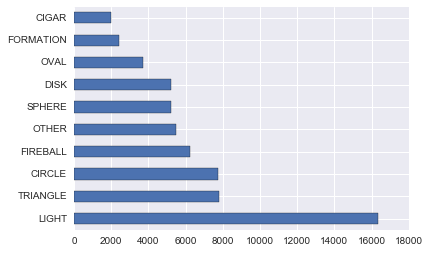

In [171]:
ufo['Shape Reported'].value_counts()[0:10].plot(kind = 'barh')
#ufo.groupby(['Shape Reported','State','Colors Reported']).size().plot(kind = 'barh')


### 9. Plot counts of sightings per City

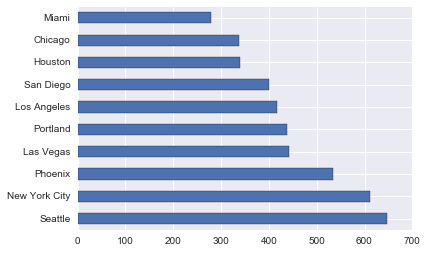

In [169]:
ufo['City'].value_counts()[0:10].plot(kind = 'barh')

### 10.  Your co-worker in your data science team has approached you with some concerns..

<center>![a real data scientist](http://nerdist.com/wp-content/uploads/2016/02/20160225_becausescience_pokemon_1x1.jpg)
_* Actual data scientists may vary in appearance_
</center>


They tell you that group counting your sightings by city might be inaccurate.  How can you reassure them that your logic is sound and you are certianly correct?  Demonstrate to them, in any other way possible (with code) that you think counting groups by city is a good idea (right?).  Show them by using another method, or grouping in conjunction with other variables validates your assumptions.

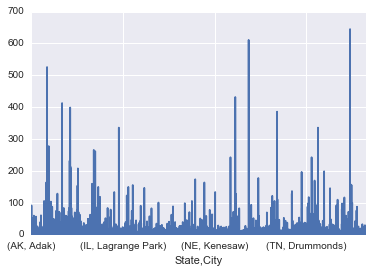

In [177]:
ufo.groupby(['State','City']).size().plot()

### 11.  Which cities have the most "CIGAR" sightings?

In [192]:
cigar_df = ufo[ufo['Shape Reported'] == 'CIGAR']
print cigar_df[0:5]
cigar_df.groupby("City").size().order(ascending = False)

         City Colors Reported Shape Reported State              Time
8     Eklutna             NaN          CIGAR    AK  10/15/1936 17:00
25  San Diego             NaN          CIGAR    CA    1/1/1944 12:00
32    Ft. Lee             NaN          CIGAR    VA    1/1/1945 12:00
74   Syracuse             NaN          CIGAR    NY   7/14/1947 10:30
88    Proctor             NaN          CIGAR    OK   8/15/1947 20:15


/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


City
New York City          19
Los Angeles            18
Phoenix                16
Seattle                14
Springfield            13
Sacramento             13
Chicago                10
San Diego              10
Las Vegas               9
Charlotte               9
Albany                  8
Memphis                 7
St. Louis               7
Cleveland               7
Boston                  7
El Paso                 7
Miami                   7
Denver                  7
Portland                7
Albuquerque             7
Dallas                  7
Kansas City             7
Richmond                7
Baltimore               6
Nashville               6
Wichita                 6
Canton                  6
Omaha                   6
Columbus                6
Philadelphia            6
                       ..
North Las Vegas         1
North Mankato           1
North Mobile County     1
Northlake               1
North Bend              1
Northridge              1
Norwood                 1
Noxen  

---

Ask instructors for help on everything previous to this point, but we have designed the bonus material around collaboration in mind.  The next few problems are to be completed without instructor help.

```
if lab_question > 11:
    no_instructors_allowed()
```

### 12.  Bonus:  Display only top 20 shape counts reported by state!

This is a weird problem yes?  You're going to have weird questions and google is your friend!  So for this problem, we have found the answer with the search term "pandas top 10 by group" is a semi-obvious place where you will find many of these types of answers.

You will easily find the answer but you will need to think about how to implement the solution as the ones you find won't be copy and paste but should demonstrate the intuition for doing so using a grouby object.

This is the expected output, _using a groupby() and [some method(s)] to display "State" and "Shape" as your group indexes with a count!_:

```
State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64
```

In [9]:
ufo.groupby(['Shape Reported','State']).size().nlargest(20)

Shape Reported  State
LIGHT           CA       2171
CIRCLE          CA       1023
LIGHT           WA       1016
TRIANGLE        CA        955
LIGHT           FL        916
                TX        847
FIREBALL        CA        808
DISK            CA        775
OTHER           CA        749
SPHERE          CA        726
LIGHT           NY        691
                AZ        677
                IL        600
                PA        581
                OH        525
FIREBALL        FL        524
LIGHT           MI        468
CIRCLE          FL        467
LIGHT           OR        466
OVAL            CA        465
dtype: int64

### 13.  Bonus:  What are the top 20 shapes by City + State?


In [10]:
ufo.groupby(['Shape Reported','State','City']).size().nlargest(20)

Shape Reported  State  City         
LIGHT           WA     Seattle          129
                AZ     Phoenix          105
                NY     New York City    105
                CA     San Diego         94
                OR     Portland          88
                NV     Las Vegas         84
                CA     Los Angeles       72
                SC     Myrtle Beach      64
DISK            NY     New York City     63
LIGHT           TX     Houston           63
                IL     Tinley Park       60
                AZ     Tucson            58
CIRCLE          NY     New York City     56
FIREBALL        WA     Seattle           55
LIGHT           FL     Orlando           55
                       Miami             53
OTHER           WA     Seattle           51
SPHERE          NY     New York City     51
CIRCLE          WA     Seattle           50
LIGHT           CA     Sacramento        48
dtype: int64

### 14. Bonus: What hours of the day are sightings most commonly reported?

To solve this problem, you will need to follow these steps:
    - Convert time feature to datetime type
    - Create a new feature based on a characteristic of the first step
    - Check our Slack for how to accomplish this (dyerrington posted this recently) 
    
There are at least 3 students who have asked how to do this out of personal interest in our class.  Your mission is to seek them out for advice.  No instructors allowed!

In [15]:
ufo.Time.dtype
ufo['Date'] = pd.to_datetime(ufo['Time'])
ufo

City Colors Reported Shape Reported State  \
0                    Ithaca             NaN       TRIANGLE    NY   
1               Willingboro             NaN          OTHER    NJ   
2                   Holyoke             NaN           OVAL    CO   
3                   Abilene             NaN           DISK    KS   
4      New York Worlds Fair             NaN          LIGHT    NY   
5               Valley City             NaN           DISK    ND   
6               Crater Lake             NaN         CIRCLE    CA   
7                      Alma             NaN           DISK    MI   
8                   Eklutna             NaN          CIGAR    AK   
9                   Hubbard             NaN       CYLINDER    OR   
10                  Fontana             NaN          LIGHT    CA   
11                 Waterloo             NaN       FIREBALL    AL   
12                   Belton             RED         SPHERE    SC   
13                   Keokuk             NaN           OVAL    IA   
14                Ludington             NaN           DISK    MI   
15              Forest Home             NaN         CIRCLE    CA   
16              Los Angeles             NaN            NaN    CA   
17                Hapeville             NaN            NaN    GA   
18                   Oneida             NaN      RECTANGLE    TN   
19               Bering Sea             RED          OTHER    AK   
20                 Nebraska             NaN           DISK    NE   
21                      NaN             NaN            NaN    LA   
22                      NaN             NaN          LIGHT    LA   
23                Owensboro             NaN      RECTANGLE    KY   
24               Wilderness             NaN           DISK    WV   
25                San Diego             NaN          CIGAR    CA   
26               Wilderness             NaN           DISK    WV   
27                   Clovis             NaN           DISK    NM   
28               Los Alamos             NaN           DISK    NM   
29             Ft. Duschene             NaN           DISK    UT   
...                     ...             ...            ...   ...   
80513            Manahawkin             NaN         CIRCLE    NJ   
80514           New Bedford             NaN          LIGHT    MA   
80515            Woodbridge             NaN       TRIANGLE    VA   
80516              Glendale             NaN       CYLINDER    CA   
80517               Laconia             NaN          CIGAR    NH   
80518             Langhorne             NaN          OTHER    PA   
80519            Glen Ellyn             RED         CIRCLE    IL   
80520            Waynesburg             NaN          FLASH    PA   
80521      Canal Winchester             NaN       TRIANGLE    OH   
80522              Lawrence          ORANGE          LIGHT    MA   
80523         Ellicott City             NaN          LIGHT    MD   
80524               Olympia             RED          LIGHT    WA   
80525             Iowa City            BLUE          LIGHT    IA   
80526            Marshfield             NaN          LIGHT    MA   
80527               Seattle             NaN        DIAMOND    WA   
80528        North Royalton             RED       TRIANGLE    OH   
80529             Deer Park             NaN          LIGHT    WA   
80530         Glen St. Mary             NaN           DISK    FL   
80531              Abingdon             NaN         CIRCLE    VA   
80532              Lawrence             NaN          LIGHT    MA   
80533             Melbourne             NaN           OVAL    IA   
80534              Burleson             NaN          LIGHT    TX   
80535         Elizabethtown             NaN         CIRCLE    KY   
80536               Wyoming             RED           DISK    PA   
80537                Neligh             NaN         CIRCLE    NE   
80538                Neligh             NaN         CIRCLE    NE   
80539          Uhrichsville             NaN          LIGHT    OH   
80540      

### 15. BONUS BONUS:  Generally, what interesting insights can you share about our UFO dataset?
    
Be as detailed as possible and tell us a nice story (long or short), about your observations.  Great ideas are:
 - Summary statistics
 - Outliers
 - Patterns
 - Latent characteristics
 - Graphs / plots / ascii art

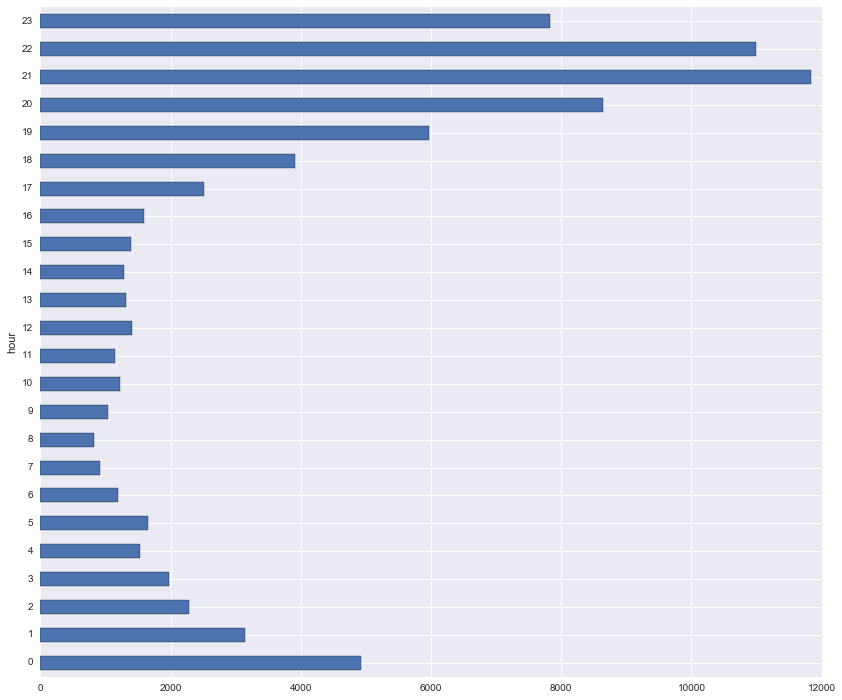

In [16]:
ufo['hour'] = ufo['Date'].map(lambda date: date.hour)
ufo.groupby('hour').size().plot(kind = 'barh', figsize = (14,12))